# Вариант №3. Панкратьев И. А.

   ## Вторичный рынок машин
1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных.Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import math as ma
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer

In [2]:
cars_df = pd.read_csv('autos.csv', encoding='iso-8859-1')
cars_df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
92992,2016-03-26 14:44:13,BMW_530d_touring,privat,Angebot,2150,control,kombi,1999,manuell,184,5er,150000,12,diesel,bmw,nein,2016-03-26 00:00:00,0,74629,2016-03-28 02:46:36
54640,2016-03-09 19:51:19,VW_Lupo_/_TÜV_bis_Januar_2017!_Fahrbereit!,privat,Angebot,1250,test,kleinwagen,2002,manuell,50,lupo,150000,3,benzin,volkswagen,ja,2016-03-09 00:00:00,0,34393,2016-03-16 03:17:12
110864,2016-03-07 16:51:30,BMW_Z4_sDrive23i__M_Sportpaket___M_Paket___19_...,privat,Angebot,23000,control,cabrio,2011,manuell,204,z_reihe,60000,2,benzin,bmw,nein,2016-03-07 00:00:00,0,88212,2016-04-05 20:47:28
163142,2016-03-23 20:31:19,OPEL_CORSA_D_1.3_CDTi__Teil_Leder__Navi__Sitzh...,privat,Angebot,6950,control,kleinwagen,2012,manuell,95,corsa,100000,9,diesel,opel,nein,2016-03-23 00:00:00,0,35510,2016-03-25 17:29:55
3264,2016-03-30 16:58:23,BMW_316i,privat,Angebot,650,test,coupe,1997,manuell,102,3er,150000,9,benzin,bmw,ja,2016-03-30 00:00:00,0,18236,2016-04-07 07:45:16
130682,2016-03-12 18:59:53,Mercedes_Benz_E_200_T__TÜV_neu!_sauber_und_gep...,privat,Angebot,1999,test,kombi,2000,automatik,163,e_klasse,150000,10,benzin,mercedes_benz,nein,2016-03-12 00:00:00,0,79365,2016-03-16 23:17:46
346384,2016-03-22 22:57:05,Mercedes_Vaneo__TÜV_neu,privat,Angebot,2000,control,kleinwagen,2003,manuell,0,andere,150000,2,benzin,mercedes_benz,nein,2016-03-22 00:00:00,0,81549,2016-03-30 13:47:53
278508,2016-03-09 11:53:56,Mazda_3_1.6_MZR,privat,Angebot,4500,test,limousine,2010,manuell,105,3_reihe,125000,1,benzin,mazda,ja,2016-03-09 00:00:00,0,21481,2016-03-16 06:45:02
238740,2016-03-30 17:58:42,Peugeot_205_1.9_GTI,privat,Angebot,3300,control,kleinwagen,1990,manuell,120,2_reihe,150000,10,benzin,peugeot,nein,2016-03-30 00:00:00,0,22301,2016-04-05 06:17:56
4811,2016-03-17 11:06:20,Passat_Variant_2.0TDI_DPF_Highline,privat,Angebot,2600,control,kombi,2005,manuell,0,passat,150000,8,diesel,volkswagen,NaN,2016-03-17 00:00:00,0,55118,2016-03-17 12:45:05


## 1. Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [3]:
print(cars_df.seller.unique())
print(cars_df.offerType.unique())
print(cars_df.abtest.unique())
print(cars_df.nrOfPictures.unique())
print(cars_df.fuelType.unique())

['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]
['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']


Из удалённых далее столбцов, возможно, мог бы пригодиться почтовый код, чтобы знать откуда придётся вывозить машину, что есть дополнительные затраты, но не думаю, что это существенно, поэтому тоже удалю.

In [4]:
cars_df_thinned = cars_df.drop(['brand', 'dateCrawled', 'seller', 'offerType', 
                                'abtest', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis = 1)
cars_df_thinned.sample(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage
25644,Volkswagen_Multivan_DPF_Atlantis,19950,bus,2007,manuell,174,transporter,150000,12,diesel,nein
241521,Mercedes_180A_CDI_mit_klima_und_sitzheizung_So...,3500,limousine,2004,manuell,109,a_klasse,150000,11,diesel,nein
4491,Citroën_C5_Kombi_HDi_110_Style,2650,kombi,2007,manuell,109,c5,150000,3,diesel,nein
39241,Volkswagen_Golf_1.9_TDI_Trendline,5900,limousine,2004,manuell,105,golf,150000,7,diesel,nein
353622,BMW_325d_DPF_Touring,12900,kombi,2009,manuell,197,3er,150000,3,diesel,nein
216889,Volkswagen_Golf_Plus_1.9_TDI_Tour,4999,bus,2006,manuell,105,golf,150000,9,diesel,nein
299043,Polo_6N_1995_mit_ATM_und_vielen_Neuteilen...,1200,NaN,2017,manuell,54,polo,60000,0,benzin,nein
228672,BMW_318i_Limousine,2300,limousine,2000,manuell,118,3er,150000,6,benzin,nein
158534,Audi_100_2_6_E,605,limousine,1994,manuell,150,100,150000,7,benzin,nein
97336,Volkswagen_Golf_1.6_TDI_DPF_Comfortline,8000,limousine,2009,manuell,105,golf,125000,11,diesel,nein


## 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [5]:
cars_df_nodupes = cars_df_thinned.drop_duplicates(['name','price','vehicleType','yearOfRegistration',
                                                   'gearbox','powerPS','model','kilometer',
                                                   'monthOfRegistration','fuelType','notRepairedDamage'])
cars_df_nodupes

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,NaN


In [6]:
print("Данных сохранено после удаления дупликатов:", 
      np.round(100 * (cars_df_nodupes['name'].count()+1) / (cars_df['name'].count()+1), 2), "%")

Данных сохранено после удаления дупликатов: 97.64 %


In [7]:
cars_df_nodupes = cars_df_nodupes.dropna()
cars_df_nodupes

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,ja
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,nein
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,nein
...,...,...,...,...,...,...,...,...,...,...,...
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,5,diesel,nein
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,ja
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,nein


## 3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

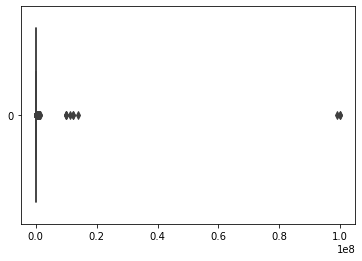

In [25]:
sns.boxplot(data=cars_df_nodupes.price.values, orient="h")

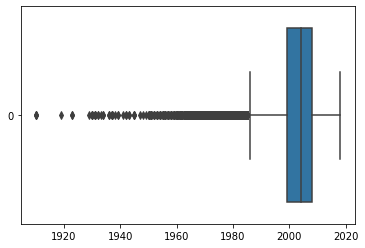

In [26]:
sns.boxplot(data=cars_df_nodupes.yearOfRegistration.values, orient="h")

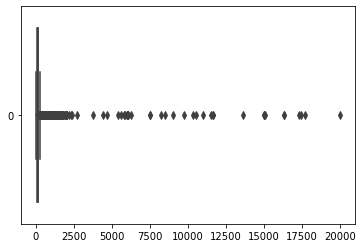

In [27]:
sns.boxplot(data=cars_df_nodupes.powerPS.values, orient="h")

In [10]:
cars_task3 = cars_df_nodupes[(cars_df_nodupes.price <= 20000) 
                             & (cars_df_nodupes.price >= 100) 
                             & (cars_df_nodupes.yearOfRegistration <= 2018 ) 
                             & (cars_df_nodupes.yearOfRegistration >= 1930) 
                             & (cars_df_nodupes.powerPS >= 0) 
                             & (cars_df_nodupes.powerPS <= 500)]

cars_task3_limits = cars_df_nodupes.drop(cars_task3.index)

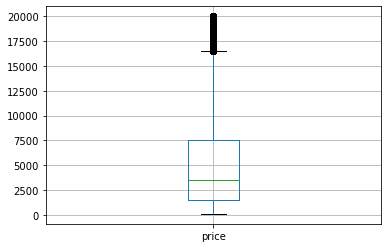

In [11]:
boxplot1 = cars_task3.boxplot(column=['price'])

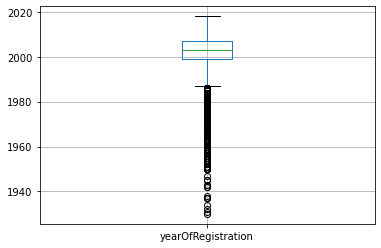

In [12]:
boxplot2 = cars_task3.boxplot(column=['yearOfRegistration'])

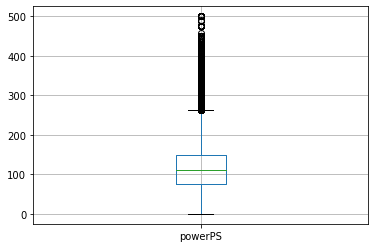

In [13]:
boxplot3 = cars_task3.boxplot(column=['powerPS'])

In [18]:
print("Данных сохранено после ограничения по значениям:", 
      np.round(100 * (cars_task3['name'].count()+1) / (cars_df_nodupes['name'].count()+1), 2), "%")

Данных сохранено после ограничения по значениям: 92.58 %


На удивление в таблице указано, что у ~10% машин ровно 0 лошадиных сил (pferdestärke).

## 4. Заполнить пропущенные данные в строковых полях.

In [19]:
task4 = cars_df_nodupes.isnull().sum()
print(task4, "\nВсего не объявленных ячеек:", task4.sum())

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
notRepairedDamage      0
dtype: int64 
Всего не объявленных ячеек: 0


In [20]:
task4 = task4.fillna('not declared')

In [21]:
task4 = cars_df_nodupes.isnull().sum()
print(task4, "\nВсего не объявленных ячеек:", task4.sum())

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
notRepairedDamage      0
dtype: int64 
Всего не объявленных ячеек: 0


## 5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

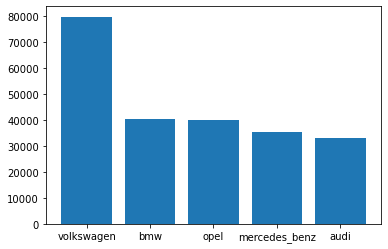

In [22]:
gist = cars_df.groupby(by='brand').brand.count().sort_values(ascending=False)
plt.bar(np.arange(5),gist.head())
plt.xticks(np.arange(len(gist.head())),gist.index)
plt.show()

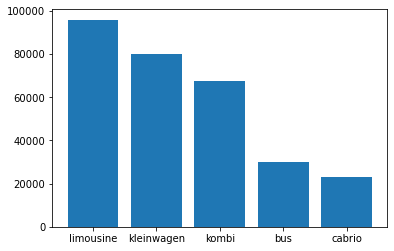

In [23]:
gist = cars_df.groupby(by='vehicleType').brand.count().sort_values(ascending=False)
plt.bar(np.arange(5),gist.head())
plt.xticks(np.arange(len(gist.head())),gist.index)
plt.show()

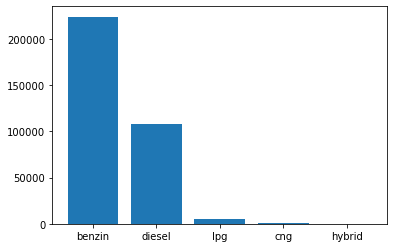

In [173]:
gist = cars_df.groupby(by='fuelType').brand.count().sort_values(ascending=False)
plt.bar(np.arange(5),gist.head())
plt.xticks(np.arange(len(gist.head())),gist.index)
plt.show()

## 6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [174]:
new_carsdf = cars_df
new_carsdf['Длина названия'] = cars_df['name'].str.len()
new_carsdf.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Длина названия
119822,2016-03-26 20:36:23,VOLKSWAGEN_SHARAN_TÜV_NEU_7_SITZER,privat,Angebot,4499,control,bus,2001,manuell,116,...,150000,2,diesel,volkswagen,nein,2016-03-26 00:00:00,0,74369,2016-04-06 13:15:52,34
344322,2016-03-09 15:52:11,Ford__Focus_Diesel__1.8,privat,Angebot,580,control,kombi,2000,manuell,75,...,150000,0,diesel,ford,NaN,2016-03-09 00:00:00,0,13347,2016-03-11 11:44:12,23
184525,2016-03-15 18:46:11,Golf_II_16_V,privat,Angebot,3500,control,coupe,1986,manuell,140,...,5000,5,benzin,volkswagen,NaN,2016-03-15 00:00:00,0,34286,2016-04-06 19:18:09,12
43253,2016-04-06 01:06:37,Volkswagen_Passat_1.8_5V_Turbo_Klimaa./SHZ/TÜV...,privat,Angebot,1444,control,limousine,1998,manuell,150,...,150000,12,benzin,volkswagen,nein,2016-04-06 00:00:00,0,65197,2016-04-06 06:25:19,58
321249,2016-03-10 15:57:05,Mercedes_Benz_GLK_220_CDI_4Matic__BlueEFFICIEN...,privat,Angebot,31900,test,suv,2013,automatik,170,...,40000,5,diesel,mercedes_benz,nein,2016-03-10 00:00:00,0,93077,2016-03-20 00:19:31,59
20272,2016-03-19 13:53:48,Volkswagen_Passat_Variant_1.6_Comfortline,privat,Angebot,3333,test,kombi,2003,manuell,102,...,150000,3,benzin,volkswagen,nein,2016-03-19 00:00:00,0,59759,2016-03-19 13:53:48,41
133322,2016-03-19 11:56:21,Volvo_C70_Coupe_Unfall_fahrbereit_Tuev_07/16,privat,Angebot,100,test,coupe,1999,automatik,170,...,150000,0,benzin,volvo,ja,2016-03-19 00:00:00,0,33428,2016-03-21 16:16:57,44
50525,2016-03-15 16:56:52,Audi_A3_2.0_TFSI_quattro,privat,Angebot,15900,control,limousine,2006,manuell,200,...,50000,12,benzin,audi,nein,2016-03-15 00:00:00,0,59872,2016-03-15 17:42:32,24
250169,2016-03-20 21:54:56,Nissan_100NX__mit_LPG,privat,Angebot,850,test,cabrio,1991,manuell,90,...,150000,3,lpg,nissan,NaN,2016-03-20 00:00:00,0,44866,2016-03-27 12:15:35,21
44311,2016-03-31 22:48:39,Meine_suesse_Hope___Nissan_micra_,privat,Angebot,450,test,kleinwagen,2001,manuell,60,...,150000,3,benzin,nissan,nein,2016-03-31 00:00:00,0,51789,2016-04-04 17:46:18,33


## 7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,Длина названия
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,-0.003164,-0.000053
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,-0.001652,0.001982
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358,0.027113,0.010299
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,-0.026694,-0.021107
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000,0.014963,0.013950
postalCode,-0.003164,-0.001652,0.027113,-0.026694,0.014963,1.000000,-0.011996
Длина названия,-0.000053,0.001982,0.010299,-0.021107,0.013950,-0.011996,1.000000


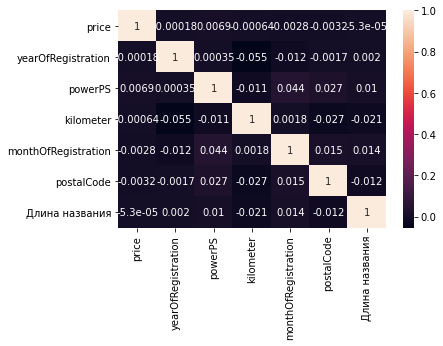

In [175]:
task7  = cars_df.drop(['nrOfPictures'], axis=1).corr()
heatmap = sns.heatmap(task7, annot=True)
heatmap
task7

In [176]:
task7.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

monthOfRegistration    0.184725
postalCode             0.173388
powerPS                0.165925
Длина названия         0.165255
yearOfRegistration     0.154001
kilometer              0.146411
Name: price, dtype: float64

## 8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.

Коэффициент корреляции Пирсона:  (-1.9486706942168524e-05, 0.9921499545898894)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.03786079449110319, pvalue=1.6385071177569834e-81)
p-value is good


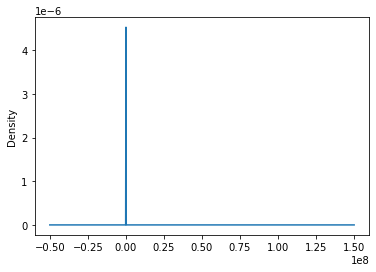

In [177]:
label_encoder = LabelEncoder()
vehicleCoder = pd.Series(label_encoder.fit_transform(cars_df_nodupes['vehicleType']))
pears = pearsonr(cars_df_nodupes['price'],vehicleCoder)
spearm = spearmanr(cars_df_nodupes['price'],vehicleCoder)

print("Коэффициент корреляции Пирсона: ",pears)
print("Коэффициент корреляции Спирмена: ",spearm)

sPrice = pd.Series(cars_df_nodupes['price'])
sPrice.plot.kde()


if (spearm[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

## 9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [178]:
task9 = cars_df_nodupes.assign(Summa=pd.Series(cars_df_nodupes['kilometer'] + cars_df_nodupes['powerPS'],
                                               index=cars_df_nodupes.index))
task9

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,notRepairedDamage,Summa
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,nein,150075
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,nein,90069
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,ja,150102
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,nein,150109
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,nein,40050
...,...,...,...,...,...,...,...,...,...,...,...,...
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,5,diesel,nein,150003
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,ja,150225
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,nein,125101
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,nein,150102
